# Ecommerce Contract Project - Linear Regression

This project is a simulation of a contracted Data Science position. As the contractor I have just recieved work with an Ecommerce company based out of New York City. The company sells clothing online but they also have in-store style and clothing advice sessions. Customers come to the store, have sessions/meetings with a personal stylist, then go home and order either on a mobile app or website.

The company is trying to decide whether to focus their efforts on their mobile app or their website. They've hired me on contract to help them figure it out and have provided me with data of various parameters they measure of their customers.

The data is contained in the Ecommerce Customers csv file and has the following important variables:
* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member.
* Yearly Amount Spent: Yearly dollar amount spent by the customer.

___

In [1]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

**Data Analysis**

Here I read in the csv file and examine its contents via .head(), .info(), and .describe(). These three commands are performed to understand the data types, quantity of data, as well as general statistical measurements of the observations.

In [2]:
customers = pd.read_csv('Ecommerce Customers')

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [5]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


___

**Data Visualization**

This is done to get a quick understanding of relationships that are in the dataset. When choosing a model, there are underlying assumptions that are being made. A big one for linear regression is that there is a linear relationship between the independent variables and dependent variable. For this dataset I'm looking for a relationship between Yearly Amount Spent and the two platforms, web and mobile app.

The two joinplots below plot Time on Website and Time on App vs. Yearly Amount Spent. It is clear from the first plot that there is a weak relationship between Time on Website and Yearly Amount Spent. However, Time on App vs. Yearly Amount begins to show a stronger relationship. Looking at the pairplot the strongest relationship is between Length of Membership and Yearly Amount Spent. 

Examining that relationship further with a linear model plot, the small range in the error bars of the fitted line indicate the strength of the linear observation. This means that the longer the customer is a member the more she will spend each year.

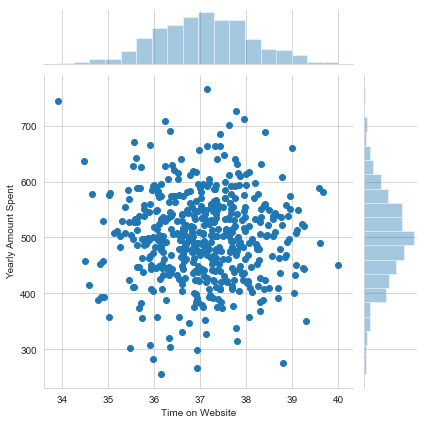

In [7]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent', data=customers)

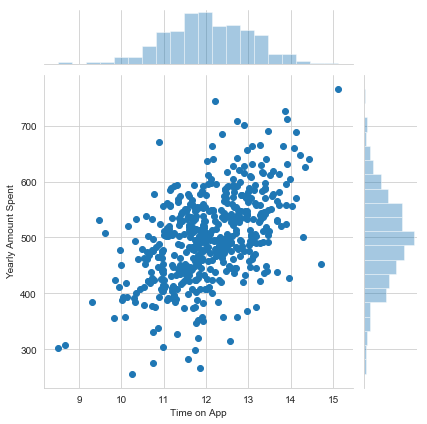

In [8]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent', data=customers)

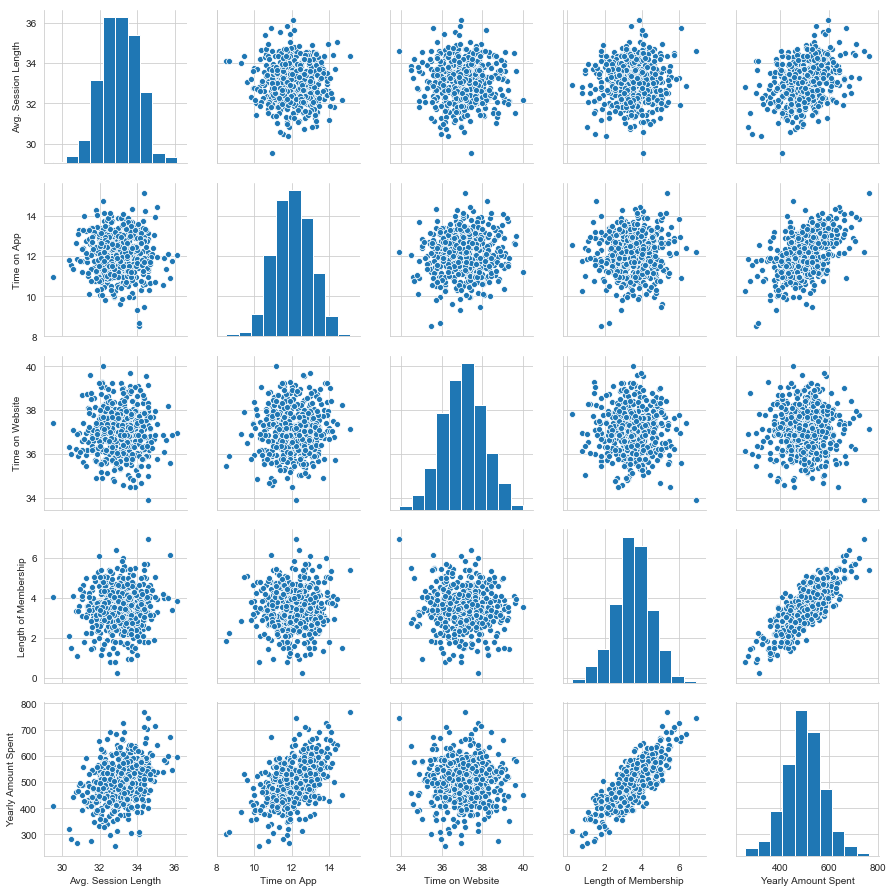

In [9]:
sns.pairplot(data=customers)

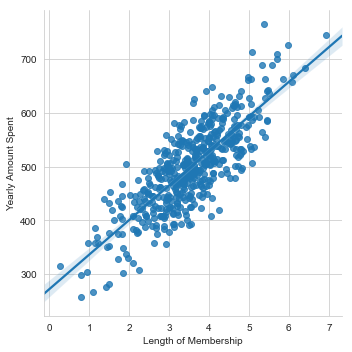

In [10]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=customers)

___

**Training and Testing**

This is a supervised learning model, so the data will be split into training and testing sets. The model chosen is Linear Regression, which is a simple algorithm for predicting a quantitative response from various predictor variables. For this model the prediction is Yearly Amount Spent and the predictors are Avg. Session Length, Time on App, Time on Website, and Length of Membership.

In [11]:
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# Separates data into training and testing datasets with the test dataset being 30% of the total dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lm = LinearRegression()

In [16]:
# Train the linear regression model.
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Looking at the coefficients dataframe it is clear that Length of Membership has the strongest effect on the Yearly Amount Spent, confirming the observations that were made above in the data visualization section.

Interpreting the coefficients:

* Holding all other features fixed, a 1 unit increase in Avg. Session Length is associated with an increase of 25.98 total dollars spent.
* Holding all other features fixed, a 1 unit increase in Time on App is associated with an increase of 38.59 total dollars spent.
* Holding all other features fixed, a 1 unit increase in Time on Website is associated with an increase of 0.19 total dollars spent.
* Holding all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of 61.27 total dollars spent.

In [17]:
# Creates a dataframe of the coefficients from the trained model.
pd.DataFrame(lm.coef_, X.columns, columns=['Coefficients'])

,Coefficients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


___

**Predicting**

What follows is the predictions from the test data. Again this is supervised learning so there is already true output variables that are stored in the y_test dataset that the predicted values can be compared against to determine how well the model performed.

The scatterplot of the predicted and true y values show a relatively straight line indicating that the model did really well. In fact the error that does exist could potentially be attributed to the irreducible error that is inherent in all datasets.

In [18]:
predicted = lm.predict(X_test)

Text(0, 0.5, 'Y True')

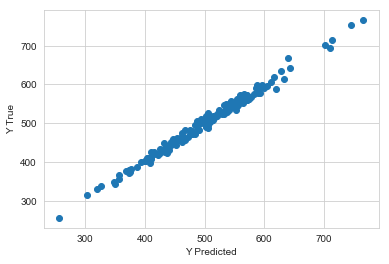

In [19]:
plt.scatter(y_test, predicted)
plt.xlabel('Y Predicted')
plt.ylabel('Y True')

___

**Model Evaluation**

It is important to understand the accuracy of the model. The first way of understanding this is to evaluate the coefficient of determination the r^2 value. By doing this it can be shown how much of the variation is explained by the model. A value closer to 1 indicates that the model explains the variation and is a good fit to the data.

Next the error in the model is evaluated with three different metrics: mean absolute error, mean squared error and root mean squared error. These are all loss functions so they want to be minimized. In regards to which metric is best for model evaluation, root mean squared error is given preference because it is in y-units (due to the square root term) and it has a greater penalty for larger errors (due to the square term).

Finally the residuals are graphed on a historgram to examine the distribution. The goal is to see a normal distribution in the residuals, which can be seen.

In [20]:
from sklearn import metrics

In [21]:
metrics.r2_score(y_test, predicted)

0.9890046246741234

In [22]:
print('MAE: ', metrics.mean_absolute_error(y_test, predicted))
print('MSE: ', metrics.mean_squared_error(y_test, predicted))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predicted)))

MAE:  7.228148653430838
MSE:  79.81305165097461
RMSE:  8.933815066978642


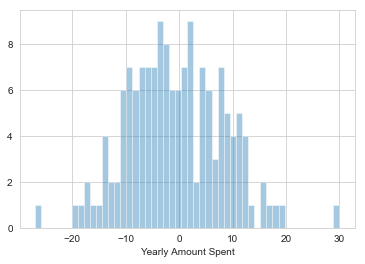

In [23]:
sns.distplot((y_test-predicted), kde=None, bins=50)

___
# Conclusion

This is tricky, there are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. However, that is a decision for the individuals in control of the business decsions. As a data scientist I have given the company the information they need to move forward with their decision it just depends what direction they would like to move. 

A huge thing for the business owners to consider is the extent to which they can innovate the two platforms. What is the cost of the innovation vs. sales increase? How come customers are using the mobile app more than the website? Ease of use? Is this a general trend for all ecommerce stores with the two platforms? 

The analysis done in this model is a great starting point in pursuit of the original question, however, the results have generated deeper questions in an effort to make the most appropriate decision. The best part though, is all these questions can be answered with analysis of the right datasets. It may be worth the companies resources to keep me around for continued work on this project.